In [74]:
import pandas as pd  # Import pandas for DataFrame operations (데이터프레임 작업을 위한 pandas 임포트)
import os  # Import os module for accessing environment variables (환경 변수 접근을 위한 os 모듈)
from dotenv import load_dotenv  # Load environment variables from a .env file (.env 파일에서 환경 변수 불러오기)

# Import required tools for creating a Pandas agent (Pandas 기반 LangChain 에이전트를 생성하기 위한 도구 임포트)
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain_openai import ChatOpenAI  # OpenAI 기반 LLM 사용을 위한 클래스 임포트

# Load environment variables from .env file (.env 파일의 환경 변수 로드)
load_dotenv()

True

In [75]:
# Load OpenAI API key from environment variable named "myKey"
# ("myKey"라는 이름의 환경 변수에서 OpenAI API 키 불러오기)
OPENAI_API_KEY = os.getenv("myKey")

In [76]:
# Read the training data from a CSV file named "train.csv" ("train.csv" 파일에서 훈련 데이터를 읽어오기)
train = pd.read_csv("train.csv")

# Display the first 5 rows of the DataFrame (데이터프레임의 상위 5개 행 출력)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Agent 를 활용 하여 구현

In [77]:
# Initialize the OpenAI language model using gpt-4o-mini (gpt-4o-mini 모델을 사용하는 OpenAI 언어 모델 초기화)
llm = ChatOpenAI(
    model="gpt-4o-mini",        # Specify the model to use (사용할 모델 지정)
    temperature=0,              # Set temperature to 0 for deterministic output (출력의 일관성을 위해 temperature를 0으로 설정)
    api_key=OPENAI_API_KEY      # Load API key from environment variable (환경 변수에서 불러온 API 키 사용)
)

# Create a Pandas DataFrame agent with LangChain (LangChain을 사용하여 Pandas 에이전트 생성)
agent_executer = create_pandas_dataframe_agent(
    llm,                        # The language model to use (사용할 언어 모델)
    train,                     # The DataFrame the agent will interact with (에이전트가 사용할 DataFrame)
    agent_type="tool-calling", # Use tool-calling agent for structured data tasks (구조화된 작업에 적합한 tool-calling 에이전트 사용)
    verbose=True,              # Print detailed logs during execution (실행 중 자세한 로그 출력)
    return_intermediate_steps=False,  # Do not return intermediate reasoning steps (중간 추론 단계를 반환하지 않음)
    allow_dangerous_code=True  # Allow code execution (코드 실행 허용 – 위험한 명령어도 허용됨)
)

In [78]:
# Ask a natural language question from the user (사용자로부터 자연어 질문을 입력받음)
myAsk = input("Your question: ")

# Invoke the agent with the input question and get the response (에이전트에게 질문을 전달하고 응답 받기)
response = agent_executer.invoke(myAsk)

# Print the original question and the response from the agent (질문과 에이전트의 응답을 출력)
print("Me:", myAsk)
print("Agent:", response)



> Entering new AgentExecutor chain...
저는 AI 언어 모델로, 질문에 답변하거나 정보를 제공하는 데 도움을 드립니다. 궁금한 점이나 필요한 정보가 있다면 말씀해 주세요!

> Finished chain.


> Entering new AgentExecutor chain...
저는 AI 언어 모델로, 질문에 답변하거나 정보를 제공하는 데 도움을 드립니다. 궁금한 점이나 필요한 정보가 있다면 말씀해 주세요!

> Finished chain.
넌뭐야
저는 AI 언어 모델로, 질문에 답변하거나 정보를 제공하는 데 도움을 드립니다. 궁금한 점이나 필요한 정보가 있다면 말씀해 주세요!




> Entering new AgentExecutor chain...


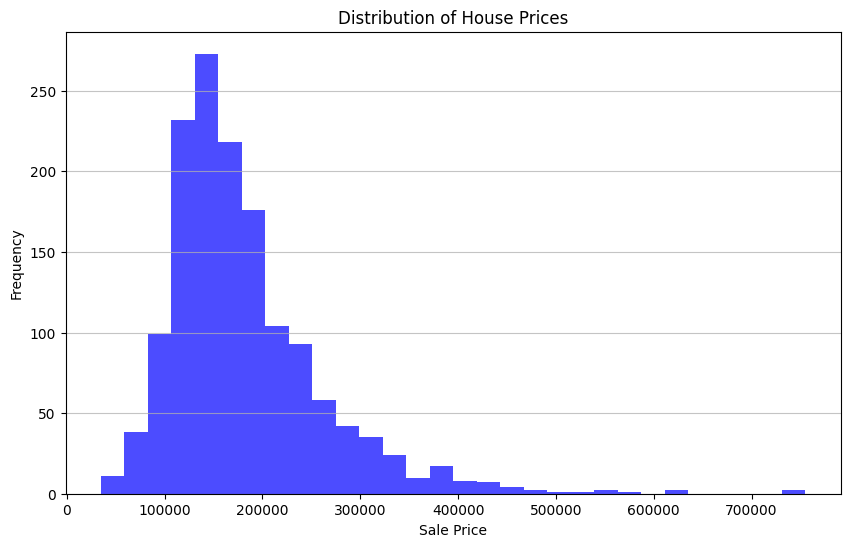


Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\n\n# 주택가격(SalePrice) 분포를 히스토그램으로 나타내기\nplt.figure(figsize=(10, 6))\nplt.hist(df['SalePrice'], bins=30, color='blue', alpha=0.7)\nplt.title('Distribution of House Prices')\nplt.xlabel('Sale Price')\nplt.ylabel('Frequency')\nplt.grid(axis='y', alpha=0.75)\nplt.show()"}`


주택가격(SalePrice)의 분포를 히스토그램으로 나타냈습니다. 히스토그램은 주택가격의 빈도수를 시각적으로 보여줍니다.

> Finished chain.


> Entering new AgentExecutor chain...


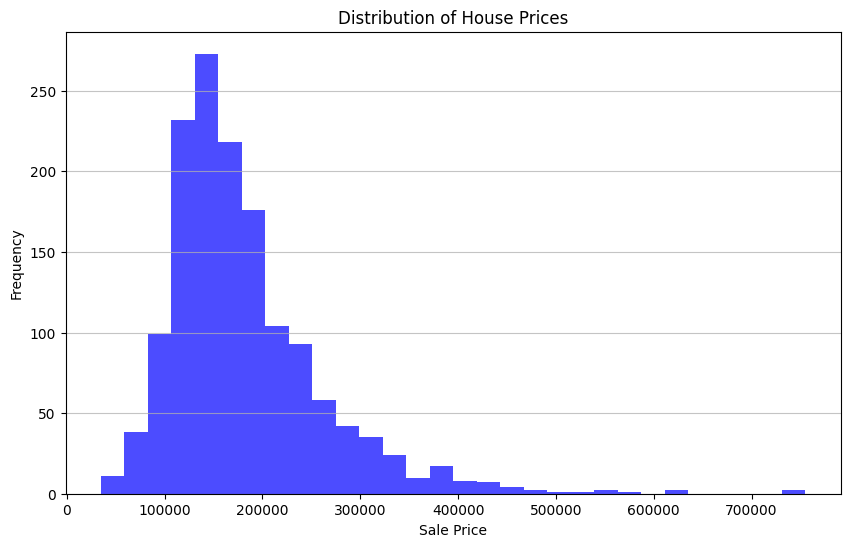


Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\n\n# 주택가격(SalePrice) 분포를 히스토그램으로 나타내기\nplt.figure(figsize=(10, 6))\nplt.hist(df['SalePrice'], bins=30, color='blue', alpha=0.7)\nplt.title('Distribution of House Prices')\nplt.xlabel('Sale Price')\nplt.ylabel('Frequency')\nplt.grid(axis='y', alpha=0.75)\nplt.show()"}`


주택가격(SalePrice)의 분포를 히스토그램으로 나타냈습니다. 히스토그램은 주택가격의 빈도수를 시각적으로 보여줍니다.

> Finished chain.
주택가격 분포를 히스토그램으로 나타내주세요.
주택가격(SalePrice)의 분포를 히스토그램으로 나타냈습니다. 히스토그램은 주택가격의 빈도수를 시각적으로 보여줍니다.


In [ ]:
# Ask the agent to visualize housing price distribution with a histogram
# (에이전트에게 주택 가격 분포를 히스토그램으로 시각화하라고 요청)
myAsk = "주택가격 분포를 히스토그램으로 나타내주세요."

# Send the question to the agent and get the response (에이전트에게 질문을 보내고 응답을 받음)
response = agent_executer.invoke(myAsk)

# Print the input and output (입력한 질문과 에이전트의 응답을 출력)
print("Me:", myAsk)
print("Agent:", response)




> Entering new AgentExecutor chain...


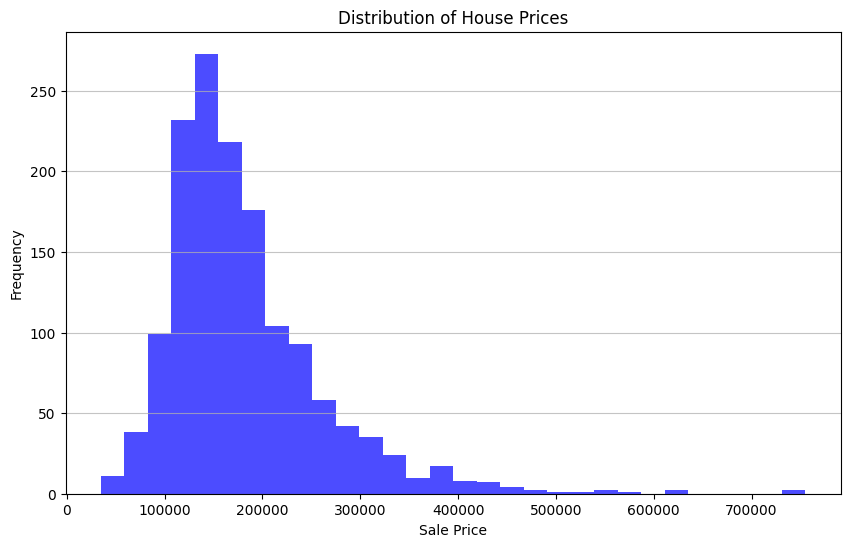


Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\n\n# 주택가격(SalePrice) 분포를 히스토그램으로 나타내기\nplt.figure(figsize=(10, 6))\nplt.hist(df['SalePrice'], bins=30, color='blue', alpha=0.7)\nplt.title('Distribution of House Prices')\nplt.xlabel('Sale Price')\nplt.ylabel('Frequency')\nplt.grid(axis='y', alpha=0.75)\nplt.show()"}`


주택가격(SalePrice)의 분포를 히스토그램으로 나타냈습니다. 히스토그램은 주택가격의 빈도수를 시각적으로 보여주며, 가격대별로 얼마나 많은 주택이 있는지를 알 수 있습니다.

> Finished chain.


In [80]:
# Initialize the OpenAI language model using gpt-4o-mini (gpt-4o-mini 모델로 OpenAI LLM 초기화)
llm = ChatOpenAI(
    model="gpt-4o-mini",         # Language model to use (사용할 언어 모델)
    temperature=0,               # Deterministic output (출력 일관성을 위한 temperature 설정)
    api_key=OPENAI_API_KEY       # API key loaded from environment variable (환경 변수에서 API 키 불러오기)
)

# Create a LangChain agent for interacting with the DataFrame (DataFrame과 상호작용하는 LangChain 에이전트 생성)
agent_executer = create_pandas_dataframe_agent(
    llm,
    train,                            # The DataFrame the agent can access (에이전트가 접근할 수 있는 DataFrame)
    agent_type="tool-calling",       # Use tool-calling agent for better tool orchestration (툴 연동에 최적화된 에이전트 유형)
    verbose=True,                    # Print detailed reasoning steps (자세한 실행 과정을 출력)
    return_intermediate_steps=True,  # Return all intermediate steps taken (중간 단계 출력 허용)
    allow_dangerous_code=True        # Allow execution of code that can modify the environment (위험한 코드 실행 허용)
)

# Ask the agent to visualize housing price distribution using a histogram (주택 가격 분포를 히스토그램으로 시각화 요청)
response = agent_executer.invoke("주택가격 분포를 히스토그램으로 나타내주세요.")

In [81]:
# response = {
#     'input': ...,                 # ✅ 내가 보낸 질문 (자연어 입력)
#     'output': ...,                # ✅ GPT가 생성한 응답 (최종 답변 텍스트)
#     'intermediate_steps': [...]  # ✅ GPT가 내부적으로 생성한 파이썬 코드 등 중간 실행 단계 리스트
# }

response

{'input': '주택가격 분포를 히스토그램으로 나타내주세요.',
 'output': '주택가격(SalePrice)의 분포를 히스토그램으로 나타냈습니다. 히스토그램은 주택가격의 빈도수를 시각적으로 보여주며, 가격대별로 얼마나 많은 주택이 있는지를 알 수 있습니다.',
 'intermediate_steps': [(ToolAgentAction(tool='python_repl_ast', tool_input={'query': "import matplotlib.pyplot as plt\n\n# 주택가격(SalePrice) 분포를 히스토그램으로 나타내기\nplt.figure(figsize=(10, 6))\nplt.hist(df['SalePrice'], bins=30, color='blue', alpha=0.7)\nplt.title('Distribution of House Prices')\nplt.xlabel('Sale Price')\nplt.ylabel('Frequency')\nplt.grid(axis='y', alpha=0.75)\nplt.show()"}, log='\nInvoking: `python_repl_ast` with `{\'query\': "import matplotlib.pyplot as plt\\n\\n# 주택가격(SalePrice) 분포를 히스토그램으로 나타내기\\nplt.figure(figsize=(10, 6))\\nplt.hist(df[\'SalePrice\'], bins=30, color=\'blue\', alpha=0.7)\\nplt.title(\'Distribution of House Prices\')\\nplt.xlabel(\'Sale Price\')\\nplt.ylabel(\'Frequency\')\\nplt.grid(axis=\'y\', alpha=0.75)\\nplt.show()"}`\n\n\n', message_log=[AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'i

시각화 코드 추출단계

In [82]:
# Extract the intermediate steps the agent took to generate the final answer
# (에이전트가 최종 답변을 생성하기 위해 수행한 중간 단계 추출)
intermediate_actions = response['intermediate_steps']

# Print the list of intermediate actions (중간 실행 작업 목록 출력)
intermediate_actions

[(ToolAgentAction(tool='python_repl_ast', tool_input={'query': "import matplotlib.pyplot as plt\n\n# 주택가격(SalePrice) 분포를 히스토그램으로 나타내기\nplt.figure(figsize=(10, 6))\nplt.hist(df['SalePrice'], bins=30, color='blue', alpha=0.7)\nplt.title('Distribution of House Prices')\nplt.xlabel('Sale Price')\nplt.ylabel('Frequency')\nplt.grid(axis='y', alpha=0.75)\nplt.show()"}, log='\nInvoking: `python_repl_ast` with `{\'query\': "import matplotlib.pyplot as plt\\n\\n# 주택가격(SalePrice) 분포를 히스토그램으로 나타내기\\nplt.figure(figsize=(10, 6))\\nplt.hist(df[\'SalePrice\'], bins=30, color=\'blue\', alpha=0.7)\\nplt.title(\'Distribution of House Prices\')\\nplt.xlabel(\'Sale Price\')\\nplt.ylabel(\'Frequency\')\\nplt.grid(axis=\'y\', alpha=0.75)\\nplt.show()"}`\n\n\n', message_log=[AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_JqXvjs64CCXo13e6VpGIgt8L', 'function': {'arguments': '{"query":"import matplotlib.pyplot as plt\\n\\n# 주택가격(SalePrice) 분포를 히스토그램으로 나타내기\\nplt.figure(fig

In [83]:
intermediate_actions[0]

(ToolAgentAction(tool='python_repl_ast', tool_input={'query': "import matplotlib.pyplot as plt\n\n# 주택가격(SalePrice) 분포를 히스토그램으로 나타내기\nplt.figure(figsize=(10, 6))\nplt.hist(df['SalePrice'], bins=30, color='blue', alpha=0.7)\nplt.title('Distribution of House Prices')\nplt.xlabel('Sale Price')\nplt.ylabel('Frequency')\nplt.grid(axis='y', alpha=0.75)\nplt.show()"}, log='\nInvoking: `python_repl_ast` with `{\'query\': "import matplotlib.pyplot as plt\\n\\n# 주택가격(SalePrice) 분포를 히스토그램으로 나타내기\\nplt.figure(figsize=(10, 6))\\nplt.hist(df[\'SalePrice\'], bins=30, color=\'blue\', alpha=0.7)\\nplt.title(\'Distribution of House Prices\')\\nplt.xlabel(\'Sale Price\')\\nplt.ylabel(\'Frequency\')\\nplt.grid(axis=\'y\', alpha=0.75)\\nplt.show()"}`\n\n\n', message_log=[AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_JqXvjs64CCXo13e6VpGIgt8L', 'function': {'arguments': '{"query":"import matplotlib.pyplot as plt\\n\\n# 주택가격(SalePrice) 분포를 히스토그램으로 나타내기\\nplt.figure(figs

In [84]:
intermediate_actions[0][0]

ToolAgentAction(tool='python_repl_ast', tool_input={'query': "import matplotlib.pyplot as plt\n\n# 주택가격(SalePrice) 분포를 히스토그램으로 나타내기\nplt.figure(figsize=(10, 6))\nplt.hist(df['SalePrice'], bins=30, color='blue', alpha=0.7)\nplt.title('Distribution of House Prices')\nplt.xlabel('Sale Price')\nplt.ylabel('Frequency')\nplt.grid(axis='y', alpha=0.75)\nplt.show()"}, log='\nInvoking: `python_repl_ast` with `{\'query\': "import matplotlib.pyplot as plt\\n\\n# 주택가격(SalePrice) 분포를 히스토그램으로 나타내기\\nplt.figure(figsize=(10, 6))\\nplt.hist(df[\'SalePrice\'], bins=30, color=\'blue\', alpha=0.7)\\nplt.title(\'Distribution of House Prices\')\\nplt.xlabel(\'Sale Price\')\\nplt.ylabel(\'Frequency\')\\nplt.grid(axis=\'y\', alpha=0.75)\\nplt.show()"}`\n\n\n', message_log=[AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_JqXvjs64CCXo13e6VpGIgt8L', 'function': {'arguments': '{"query":"import matplotlib.pyplot as plt\\n\\n# 주택가격(SalePrice) 분포를 히스토그램으로 나타내기\\nplt.figure(figsi

In [85]:
visual_code = intermediate_actions[0][0].tool_input["query"]

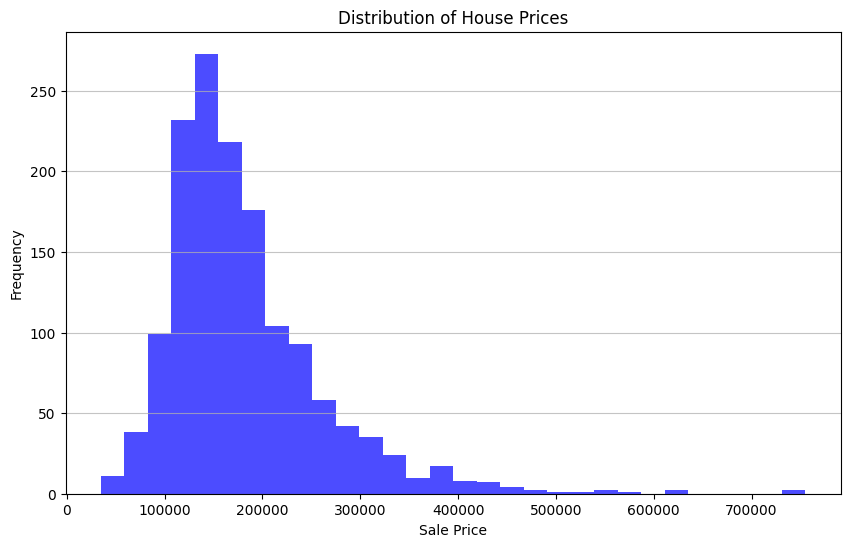

In [ ]:
df = train.copy()
#파이썬 코드로 실행 exec 메서드
exec(visual_code)